# DecisionTreeClassifier
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier
* class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
* 뭔 놈의 옵션이 이렇게 많아!!
* PDF 168 페이지에서 주요 옵션들에 대해 살펴보기로 합시다. 당연히 더 자세한 정보는 공식문서와 구글링 ^^

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 경고문구를 무시하는 메세지 추가
import warnings
warnings.filterwarnings('ignore')

# Create DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=156)

# 아이리스 데이터 로드 & 학습/테스트 데이터 셋 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=36)
    
# 학습과 예측을 시작하지
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

# GET accuracy_score
print('DecisionTree 정확도: {0: .4f}'.format(accuracy_score(y_test, dt_pred)))


DecisionTree 정확도:  0.9667


In [2]:
dt_clf.feature_importances_

array([0.00750469, 0.03126954, 0.58827442, 0.37295135])

In [3]:
iris_data.feature_names

# 여기서 PDF 178 페이지를 만난다면 가장 뒤에 2개를 쓰는 게 좋겠다는 걸 알 수 있겠지

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

#### graphviz 를 활용한 tree
* 시각화한 걸 우리도 이제 보기만 하지 말고 저장이라는 걸 해봅시다
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html?highlight=graphviz#sklearn.tree.export_graphviz
* sklearn.tree.export_graphviz(decision_tree, out_file=None, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, leaves_parallel=False, impurity=True, node_ids=False, proportion=False, rotate=False, rounded=False, special_characters=False, precision=3, fontname='helvetica')

In [4]:
from sklearn.tree import export_graphviz

# tree.dot 라는 파일이 생성될 거임
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, feature_names=iris_data.feature_names, impurity=True, filled=True)


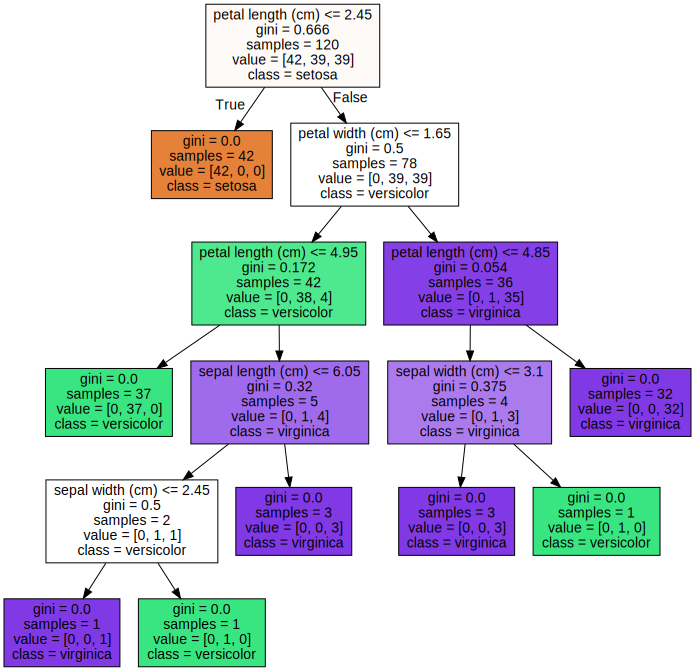

In [6]:
# tree.dot에 담긴 데이터를 이미지 파일로 저장하고 시각화도 해봅시다 (분명히 뭔가 들어있는데 저것은 무엇인고)
# PDF에 잘못나와 있으니까 구글에 graphviz 검색해서 나오는 공식 사이트에서 다운로드 받으세요
# 파이썬 라이브러리가 없으면 당연히 pip install 진행하셔야쥬

import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

##### max_depth=3

DecisionTree 정확도:  0.9667


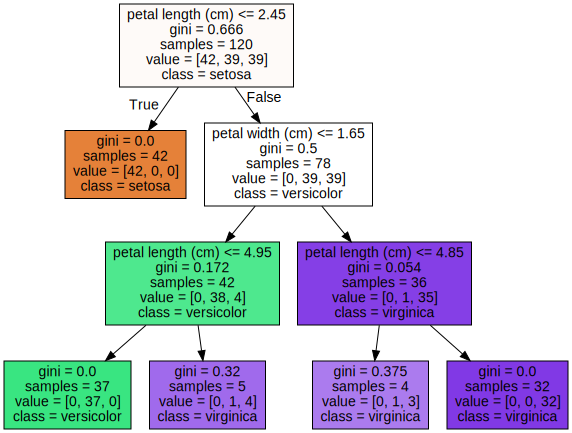

In [12]:
# Create DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=156)

# 아이리스 데이터 로드 & 학습/테스트 데이터 셋 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=36)
    
# 학습과 예측을 시작하지
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

# GET accuracy_score
print('DecisionTree 정확도: {0: .4f}'.format(accuracy_score(y_test, dt_pred)))

export_graphviz(dt_clf, out_file="tree_dep3.dot", class_names=iris_data.target_names, feature_names=iris_data.feature_names, impurity=True, filled=True)

with open("tree_dep3.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

##### min_samples_split = 4

DecisionTree 정확도:  0.9667


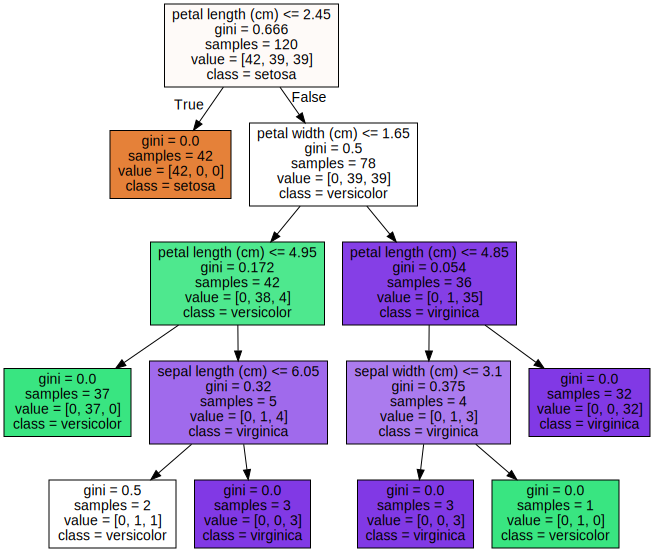

In [13]:
# Create DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(min_samples_split=4, random_state=156)

# 아이리스 데이터 로드 & 학습/테스트 데이터 셋 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=36)
    
# 학습과 예측을 시작하지
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

# GET accuracy_score
print('DecisionTree 정확도: {0: .4f}'.format(accuracy_score(y_test, dt_pred)))

export_graphviz(dt_clf, out_file="tree_min4.dot", class_names=iris_data.target_names, feature_names=iris_data.feature_names, impurity=True, filled=True)

with open("tree_min4.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

##### min_samples_leaf 4

DecisionTree 정확도:  0.9667


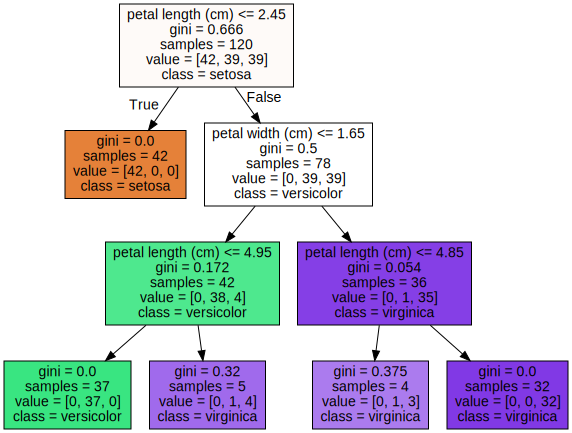

In [14]:
# Create DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(min_samples_leaf=4, random_state=156)

# 아이리스 데이터 로드 & 학습/테스트 데이터 셋 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=36)
    
# 학습과 예측을 시작하지
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

# GET accuracy_score
print('DecisionTree 정확도: {0: .4f}'.format(accuracy_score(y_test, dt_pred)))

export_graphviz(dt_clf, out_file="tree_leaf4.dot", class_names=iris_data.target_names, feature_names=iris_data.feature_names, impurity=True, filled=True)

with open("tree_leaf4.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [1]:
print("git test")

git test
